In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from pandas import DataFrame
from sklearn import metrics
from sklearn.decomposition import PCA


In [18]:
import os
print(os.getcwd())
os.chdir('/home/liujingyue/wyc_20231021/Python/Kmeans&PCA/')
print(os.getcwd())

/home/liujingyue/wyc_20231021/Python/Kmeans&PCA
/home/liujingyue/wyc_20231021/Python/Kmeans&PCA


In [23]:
df_raw = pd.read_csv(r'exprmatrix.csv',sep=',',index_col = 0)


In [24]:
df_raw 

,GABRD,DENND2C,ANKRD35,ECM1,BNIPL,CRABP2,DPT,ESRRG,KHK,ABCG5,...,MAGEA11,MAGEA9,PASD1,MAGEA10,MAGEA2B,MAGEA2,MAGEA1,PNMA6E,CTAG1A,SRY
our_data_gc04-post_ACACAGTTCGGTAGAG-1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
our_data_gc04-post_ACAGAAATCACGACTA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
our_data_gc04-post_ACCAAACAGCTAGCCC-1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
our_data_gc04-post_ACCTGTCAGCGAGTAC-1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
our_data_gc04-post_ACGTAACAGGGAGATA-1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9post_TTTATGCCATTGTGCA-1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P9post_TTTCCTCCAGGAATGC-1,0,0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
P9post_TTTCCTCGTGAACCTT-1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P9post_TTTCCTCTCGCCTGAG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_normalized_data = df_raw.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
df_normalized_data1 = df_normalized_data.dropna(axis=1, how='any')

In [30]:
df_normalized_data1

,GABRD,DENND2C,ANKRD35,ECM1,BNIPL,CRABP2,DPT,ESRRG,KHK,ABCG5,...,CFAP47,GAGE1,GAGE2A,ESX1,HTR2C,CT45A1,MAGEA11,MAGEA10,MAGEA2B,MAGEA2
our_data_gc04-post_ACACAGTTCGGTAGAG-1,0.0,0.000000,0.0,0.000000,0.0,0.035714,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
our_data_gc04-post_ACAGAAATCACGACTA-1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
our_data_gc04-post_ACCAAACAGCTAGCCC-1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.027027,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
our_data_gc04-post_ACCTGTCAGCGAGTAC-1,0.0,0.142857,0.0,0.000000,0.0,0.035714,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
our_data_gc04-post_ACGTAACAGGGAGATA-1,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9post_TTTATGCCATTGTGCA-1,0.0,0.000000,0.0,0.055556,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P9post_TTTCCTCCAGGAATGC-1,0.0,0.000000,0.0,0.055556,0.0,0.000000,0.0,0.000000,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P9post_TTTCCTCGTGAACCTT-1,0.0,0.000000,0.0,0.055556,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P9post_TTTCCTCTCGCCTGAG-1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_normalized_data = df_normalized_data1

In [ ]:
# 计算pearson相关系数
df_corr = df_normalized_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data=df_corr, annot=True, fmt='.2f', annot_kws={'size': 7}, cmap='Greens')  # 若不喜欢绿色，可以通过cmap更改颜色
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=7)
plt.title('皮尔逊相关系数矩阵', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
#plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8420344820>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8420344820>
Traceback 

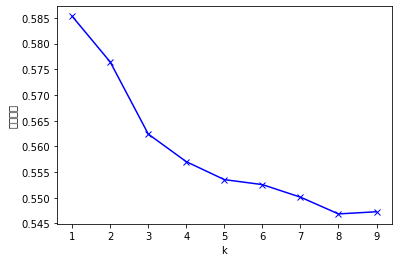

In [42]:
# 手肘图法1——基于平均离差
K = range(1, 10)
meanDispersions = []
for k in K:
    kemans = KMeans(n_clusters=k, init='k-means++',n_init=10)
    kemans.fit(df_normalized_data)
    # 计算平均离差
    m_Disp = sum(np.min(cdist(df_normalized_data, kemans.cluster_centers_, 'euclidean'), axis=1)) / df_normalized_data.shape[0]
    meanDispersions.append(m_Disp)

plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.rcParams['font.sans-serif'] = ['Wawati TC']
plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 正确显示负号
plt.rcParams['axes.unicode_minus']= False
plt.plot(K, meanDispersions, 'bx-')
plt.xlabel('k')
plt.ylabel('平均离差')
plt.title('')
plt.show()

In [49]:
# ----------------- 开始 K-means 聚类的一系列过程---------------------
# K-means聚类
kms = KMeans(n_clusters=2, init='k-means++',n_init = 10)
data_fig = kms.fit(df_normalized_data)  # 模型拟合
centers = kms.cluster_centers_  # 计算聚类中心
labs = kms.labels_  # 为数据打标签
df_labels = DataFrame(kms.labels_)  # 将标签存放为DataFrame
df_labels.to_excel('datalabels.xlsx')  # 输出数据标签，其实输出可有可无

# 将聚类结果为 0，1,2,3,4 的数据筛选出来 并打上标签
df_A_0 = df_normalized_data[kms.labels_ == 0]
df_A_1 = df_normalized_data[kms.labels_ == 1]
df_A_2 = df_normalized_data[kms.labels_ == 2]
df_A_3 = df_normalized_data[kms.labels_ == 3]
df_A_4 = df_normalized_data[kms.labels_ == 4]
m = np.shape(df_A_0)[1]
df_A_0.insert(df_A_0.shape[1], 'label', 0)  # 打标签
df_A_1.insert(df_A_1.shape[1], 'label', 1)
df_A_2.insert(df_A_2.shape[1], 'label', 2)
df_A_3.insert(df_A_3.shape[1], 'label', 3)
df_A_4.insert(df_A_4.shape[1], 'label', 4)
df_labels_data = pd.concat([df_A_0, df_A_1, df_A_2, df_A_3, df_A_4])  # 数据融合
df_labels_data.to_excel('data_labeled.xlsx')  # 输出带有标签的数据

# 输出最终聚类中心
df_centers = DataFrame(centers)
df_centers.to_excel('data_final_center.xlsx')


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f842d84a4c0>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f842d84a4c0>
Traceback 

In [45]:
df_labels_data

,GABRD,DENND2C,ANKRD35,ECM1,BNIPL,CRABP2,DPT,ESRRG,KHK,ABCG5,...,GAGE1,GAGE2A,ESX1,HTR2C,CT45A1,MAGEA11,MAGEA10,MAGEA2B,MAGEA2,label
our_data_gc09-post_AACGAAACAGAACATA-1,0.0,0.000000,0.0,0.0,0.0,0.428571,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
our_data_gc09-post_AAGGTAAGTTTCTTAC-1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.027027,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
our_data_gc09-post_AGCGTCGCAATCCAGT-1,0.0,0.142857,0.0,0.0,0.0,0.000000,0.0,0.000000,0.083333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
our_data_gc09-post_AGGCATTAGTCGGCAA-1,0.0,0.000000,0.0,0.0,0.0,0.035714,0.0,0.000000,0.083333,0.363636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
our_data_gc09-post_AGGGAGTGTTGCTCGG-1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8pre_AAGACCTTCAGATAAG-1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
P8pre_CGGGTCAAGTAACCCT-1,0.0,0.000000,0.0,0.0,0.5,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
P8pre_CTTCTCTTCGAATCCA-1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
P8pre_TCGGGACAGACACTAA-1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [46]:
df_centers

,0,1,2,3,4,5,6,7,8,9,...,730,731,732,733,734,735,736,737,738,739
0,1.304348e-02,0.027484,0.004348,0.035205,0.003261,0.055978,5.434783e-04,0.000441,0.023551,0.014032,...,2.168404e-19,-2.168404e-19,8.673617e-19,1.084202e-19,1.086957e-03,5.421011e-20,4.021739e-02,2.173913e-03,1.086957e-03,3.260870e-03
1,1.913723e-03,0.002734,0.001834,0.002552,0.000917,0.003318,1.594769e-03,0.000545,0.002784,0.000747,...,3.189538e-04,1.036600e-03,7.973846e-04,1.594769e-04,7.973846e-05,7.973846e-05,4.040082e-03,2.392154e-04,1.594769e-04,1.680513e-18
2,1.795332e-03,0.003078,0.002693,0.006683,0.006284,0.000513,-2.818926e-18,0.003348,0.046978,0.000816,...,-4.336809e-19,-3.252607e-19,-5.421011e-19,-2.168404e-19,-2.168404e-19,-1.084202e-19,1.734723e-18,-2.710505e-19,-1.897354e-19,-1.897354e-19
3,1.003009e-03,0.018054,0.007021,0.003120,0.010532,0.002221,2.006018e-03,0.005883,0.009612,0.002735,...,2.168404e-19,-1.084202e-19,9.757820e-19,1.084202e-19,1.084202e-19,5.421011e-20,-8.673617e-19,4.878910e-19,-2.439455e-19,-2.439455e-19
4,5.637851e-18,0.016571,0.002667,0.002593,0.003333,0.000381,1.333333e-03,0.000360,0.001333,0.000242,...,-4.336809e-19,-2.168404e-19,-5.421011e-19,-2.168404e-19,-2.168404e-19,-1.084202e-19,1.734723e-18,-2.710505e-19,5.421011e-20,5.421011e-20


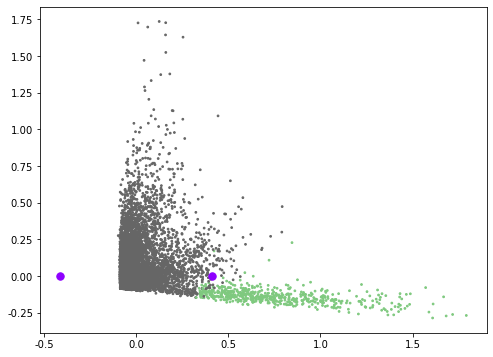

In [50]:
# ------------------------下面介绍如何绘制聚类散点图-----------------------------
# 对二分类的散点图绘制，网上教程很多，此篇文章主要介绍多分类的散点图绘制问题
# 首先，对原数据进行 PCA 降维处理，获得散点图的横纵坐标轴数据
pca = PCA(n_components=2)  # 提取两个主成分，作为坐标轴
pca.fit(df_normalized_data)
data_pca = pca.transform(df_normalized_data)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca.insert(data_pca.shape[1], 'labels', labs)

# centers pca 对 K-means 的聚类中心降维，对应到散点图的二维坐标系中
pca = PCA(n_components=2)
pca.fit(centers)
data_pca_centers = pca.transform(centers)
data_pca_centers = pd.DataFrame(data_pca_centers, columns=['PC1', 'PC2'])

# Visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca.values[:, 0], data_pca.values[:, 1], s=3, c=data_pca.values[:, 2], cmap='Accent')
plt.scatter(data_pca_centers.values[:, 0], data_pca_centers.values[:, 1], marker='o', s=55, c='#8E00FF')
plt.show()


In [51]:
pca

PCA(n_components=2)

In [52]:
print(pca.components_)

[[-7.89574238e-04 -3.16146711e-03  3.79038585e-04 ... -4.00871780e-04
  -2.40523068e-04 -2.40523068e-04]
 [-8.28875095e-01  3.06789258e-03  7.69991687e-05 ...  1.41846722e-04
   3.77223123e-05 -8.07419901e-05]]


In [53]:
PC1

NameError: name 'PC1' is not defined

In [54]:
pd.DataFrame(data_pca_centers, columns=['PC1', 'PC2'])

,PC1,PC2
0,0.410155,5.533768e-16
1,-0.410155,-5.316927e-16
